##### Hello! In this notebook I plan to see how much the rain affects fremont bike traffic! 
##### i got the rain data from here -> https://www.ncdc.noaa.gov/cdo-web/search
##### and the fremont bike data from here -> https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


### currnet weather frame only goes to 2019
#rain_data_frame = pd.read_csv('C:/Users/aaron/Code/Data/Rain In Fremont.csv', parse_dates=[5])
rain_data_frame = pd.read_csv('C:/Users/aaron/Code/Data/Seattle_MultiStation_Weather.csv', parse_dates=[5])
bike_data_frame = pd.read_csv('C:/Users/aaron/Code/Data/Fremont_Bridge_Bicycle_Counter_20231106.csv', parse_dates=[0])

bike_data_frame.head()



,Date,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk"
0,2022-08-01 00:00:00,23.0,7.0,16.0
1,2022-08-01 01:00:00,12.0,5.0,7.0
2,2022-08-01 02:00:00,3.0,0.0,3.0
3,2022-08-01 03:00:00,5.0,2.0,3.0
4,2022-08-01 04:00:00,10.0,2.0,8.0


In [2]:
bike_data_frame.sort_values('Date', ascending=True, inplace=True)

march_14_mask = bike_data_frame['Date'] >= pd.to_datetime("2013-03-14 00:00:00")

bike_data_frame = bike_data_frame[march_14_mask]

bike_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91752 entries, 4632 to 95639
Data columns (total 4 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Date                                                                91752 non-null  datetime64[ns]
 1   Fremont Bridge Sidewalks, south of N 34th St                        91727 non-null  float64       
 2   Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk  91727 non-null  float64       
 3   Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk  91727 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 3.5 MB


In [3]:
total_bikes = bike_data_frame['Fremont Bridge Sidewalks, south of N 34th St'].sum()

### 9.907.160.0
total_bikes

9907160.0

In [4]:
bike_data_frame['Date']

4632    2013-03-14 00:00:00
4633    2013-03-14 01:00:00
4634    2013-03-14 02:00:00
4635    2013-03-14 03:00:00
4636    2013-03-14 04:00:00
                ...        
95635   2023-08-31 19:00:00
95636   2023-08-31 20:00:00
95637   2023-08-31 21:00:00
95638   2023-08-31 22:00:00
95639   2023-08-31 23:00:00
Name: Date, Length: 91752, dtype: datetime64[ns]

In [5]:
### total bikes over days in bike frame
9907160.0 / 3823

2591.462202458802

In [6]:
## doing this line for groupb purposes
bike_data_frame['Date_Only'] = bike_data_frame['Date'].dt.date

In [7]:
#### aggregate (Smush rows) of  both frames!

rain_aggregation_functions = {'STATION':'first','NAME':'first','LATITUDE':'first','LONGITUDE':'first','ELEVATION':'first','DAPR':'mean','MDPR':'mean','PRCP':'mean','SNOW':'mean','SNWD':'mean','WESD':'mean', 'WESF':'mean'}

combined_rain_frame = rain_data_frame.groupby('DATE').aggregate(rain_aggregation_functions).reset_index()

bike_aggregation_functions = {'Date':'first','Fremont Bridge Sidewalks, south of N 34th St':'sum','Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk':'sum','Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk':'sum'}

combined_bike_frame = bike_data_frame.groupby('Date_Only').aggregate(bike_aggregation_functions).reset_index()

In [8]:
combined_rain_frame['PRCP']

0       0.170
1       0.030
2       0.000
3       0.035
4       0.060
        ...  
3718    0.000
3719    0.970
3720    0.115
3721    0.780
3722    0.700
Name: PRCP, Length: 3723, dtype: float64

In [9]:
##### add day month and year columns for ease

#rain_data_frame['DAY'] = rain_data_frame['DATE'].iloc[:2]

combined_rain_frame['DAY'] = combined_rain_frame['DATE'].dt.day
combined_rain_frame['MONTH'] = combined_rain_frame['DATE'].dt.month
combined_rain_frame['YEAR'] = combined_rain_frame['DATE'].dt.year
combined_rain_frame['WEEK_NUM'] = combined_rain_frame['DATE'].dt.isocalendar().week
#rain_data_frame['DAY_OF_YEAR'] = rain_data_frame['DATE'].dt.timetuple().tm_yday

combined_bike_frame['Day'] = combined_bike_frame['Date'].dt.day
combined_bike_frame['Month'] = combined_bike_frame['Date'].dt.month
combined_bike_frame['Year'] = combined_bike_frame['Date'].dt.year
combined_bike_frame['Time'] = combined_bike_frame['Date'].dt.time
combined_bike_frame['Date_Only'] = combined_bike_frame['Date'].dt.date
combined_bike_frame['Week_Num'] = combined_bike_frame['Date'].dt.isocalendar().week
#bike_data_frame['Day_Of_Year'] = bike_data_frame['DATE'].dt.timetuple().tm_yday


#print (datestr.iloc[:3])

In [10]:
#print (rain_data_frame.info())
combined_rain_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       3723 non-null   datetime64[ns]
 1   STATION    3723 non-null   object        
 2   NAME       3723 non-null   object        
 3   LATITUDE   3723 non-null   float64       
 4   LONGITUDE  3723 non-null   float64       
 5   ELEVATION  3723 non-null   float64       
 6   DAPR       354 non-null    float64       
 7   MDPR       352 non-null    float64       
 8   PRCP       3687 non-null   float64       
 9   SNOW       1881 non-null   float64       
 10  SNWD       50 non-null     float64       
 11  WESD       25 non-null     float64       
 12  WESF       22 non-null     float64       
 13  DAY        3723 non-null   int64         
 14  MONTH      3723 non-null   int64         
 15  YEAR       3723 non-null   int64         
 16  WEEK_NUM   3723 non-null   UInt32        


In [11]:
combined_rain_frame.head()

,DATE,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF,DAY,MONTH,YEAR,WEEK_NUM
0,2013-03-14,US1WAKG0188,"SEATTLE 3.3 N, WA US",47.6701,-122.3546,107.6,NaN,NaN,0.170,NaN,NaN,NaN,NaN,14,3,2013,11
1,2013-03-15,US1WAKG0188,"SEATTLE 3.3 N, WA US",47.6701,-122.3546,107.6,NaN,NaN,0.030,NaN,NaN,NaN,NaN,15,3,2013,11
2,2013-03-16,US1WAKG0188,"SEATTLE 3.3 N, WA US",47.6701,-122.3546,107.6,NaN,NaN,0.000,NaN,NaN,NaN,NaN,16,3,2013,11
3,2013-03-17,US1WAKG0188,"SEATTLE 3.3 N, WA US",47.6701,-122.3546,107.6,NaN,NaN,0.035,NaN,NaN,NaN,NaN,17,3,2013,11
4,2013-03-18,US1WAKG0188,"SEATTLE 3.3 N, WA US",47.6701,-122.3546,107.6,NaN,NaN,0.060,0.0,NaN,NaN,NaN,18,3,2013,12


In [12]:
combined_bike_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3823 entries, 0 to 3822
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Date_Only                                                           3823 non-null   object        
 1   Date                                                                3823 non-null   datetime64[ns]
 2   Fremont Bridge Sidewalks, south of N 34th St                        3823 non-null   float64       
 3   Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk  3823 non-null   float64       
 4   Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk  3823 non-null   float64       
 5   Day                                                                 3823 non-null   int64         
 6   Month                                                   

In [13]:
combined_bike_frame.head()

,Date_Only,Date,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk",Day,Month,Year,Time,Week_Num
0,2013-03-14,2013-03-14,2202.0,1139.0,1063.0,14,3,2013,00:00:00,11
1,2013-03-15,2013-03-15,2355.0,1172.0,1183.0,15,3,2013,00:00:00,11
2,2013-03-16,2013-03-16,1063.0,595.0,468.0,16,3,2013,00:00:00,11
3,2013-03-17,2013-03-17,1295.0,745.0,550.0,17,3,2013,00:00:00,11
4,2013-03-18,2013-03-18,2381.0,1181.0,1200.0,18,3,2013,00:00:00,12


In [14]:
### Merge the frames!!
combined_data_frame = pd.merge(left = combined_bike_frame, right = combined_rain_frame, left_on = 'Date', right_on = 'DATE', how = 'inner')

In [15]:
combined_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3657 entries, 0 to 3656
Data columns (total 27 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Date_Only                                                           3657 non-null   object        
 1   Date                                                                3657 non-null   datetime64[ns]
 2   Fremont Bridge Sidewalks, south of N 34th St                        3657 non-null   float64       
 3   Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk  3657 non-null   float64       
 4   Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk  3657 non-null   float64       
 5   Day                                                                 3657 non-null   int64         
 6   Month                                                   

In [16]:
No_Rain_Mask = combined_data_frame['PRCP'] == 0
Yes_Rain_Mask = combined_data_frame['PRCP'] > 0
No_Rain_Frame = combined_data_frame[No_Rain_Mask]
Yes_Rain_Frame = combined_data_frame[Yes_Rain_Mask]

In [17]:
No_Rain_Frame['Fremont Bridge Sidewalks, south of N 34th St'].mean() ## 3140.6748768472908

No_Rain_Frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1624 entries, 2 to 3653
Data columns (total 27 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Date_Only                                                           1624 non-null   object        
 1   Date                                                                1624 non-null   datetime64[ns]
 2   Fremont Bridge Sidewalks, south of N 34th St                        1624 non-null   float64       
 3   Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk  1624 non-null   float64       
 4   Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk  1624 non-null   float64       
 5   Day                                                                 1624 non-null   int64         
 6   Month                                                   

In [18]:
Yes_Rain_Frame['Fremont Bridge Sidewalks, south of N 34th St'].mean() ## 2098.803803803804

Yes_Rain_Frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 0 to 3656
Data columns (total 27 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Date_Only                                                           1998 non-null   object        
 1   Date                                                                1998 non-null   datetime64[ns]
 2   Fremont Bridge Sidewalks, south of N 34th St                        1998 non-null   float64       
 3   Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk  1998 non-null   float64       
 4   Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk  1998 non-null   float64       
 5   Day                                                                 1998 non-null   int64         
 6   Month                                                   

<function matplotlib.pyplot.show(close=None, block=None)>

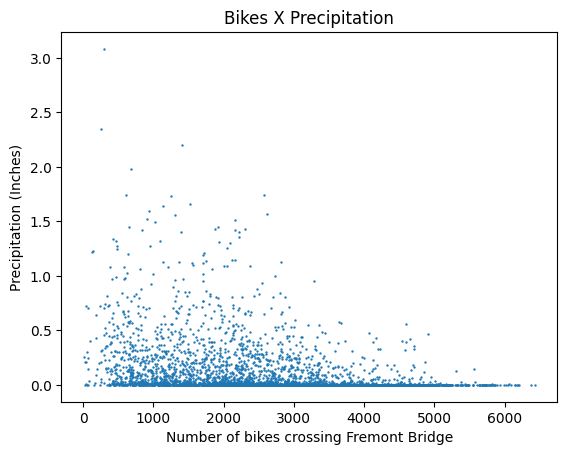

In [19]:
##plotting!!!


x = combined_data_frame['Fremont Bridge Sidewalks, south of N 34th St']
y = combined_data_frame['PRCP']

plt.scatter(x, y, s = 0.5)
plt.title('Bikes X Precipitation')
plt.xlabel('Number of bikes crossing Fremont Bridge')
plt.ylabel('Precipitation (Inches)')

plt.show

<Axes: title={'center': 'Number of bikes by precipitation'}, xlabel='PRCP'>

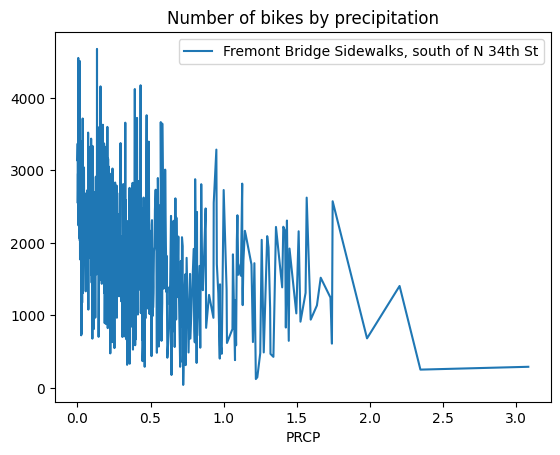

In [20]:
prcp_line = combined_data_frame.groupby('PRCP').agg({'Fremont Bridge Sidewalks, south of N 34th St':'mean'})

prcp_line.plot(title = 'Number of bikes by precipitation', label = '')

#bins = pd.cut(combined_data_frame['PRCP'], bins = [-.5,0,0.5,1,1.5,2,2.5,3,3.5])
#plt.bar(bins,combined_data_frame['Fremont Bridge Sidewalks, south of N 34th St'])

#plt.hist(y = combined_data_frame['Fremont Bridge Sidewalks, south of N 34th St'], bins = bins.astype(str))
#plt.show()

#bins.head()
#bins.info()

<Axes: title={'center': 'Number of bikes by precipitation, Rounded'}, xlabel='PRCP_ROUNDED'>

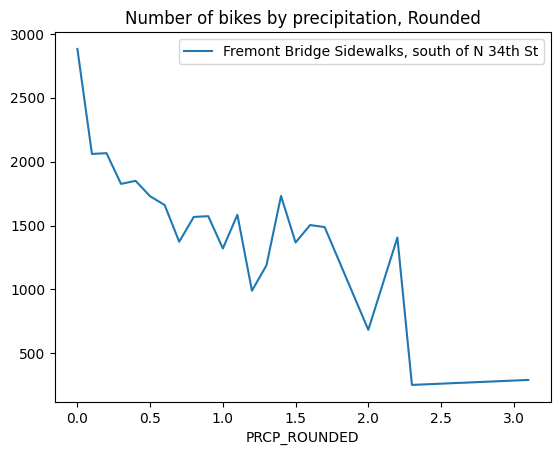

In [21]:
prcp_rounded = combined_data_frame['PRCP'].round(1)

combined_data_frame['PRCP_ROUNDED'] = prcp_rounded

prcp_rounded_line = combined_data_frame.groupby('PRCP_ROUNDED').agg({'Fremont Bridge Sidewalks, south of N 34th St':'mean'})

prcp_rounded_line.plot(title = 'Number of bikes by precipitation, Rounded')

<function matplotlib.pyplot.show(close=None, block=None)>

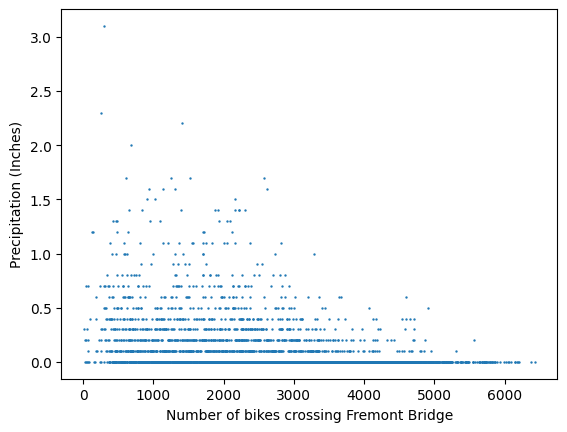

In [22]:
x = combined_data_frame['Fremont Bridge Sidewalks, south of N 34th St']
y = combined_data_frame['PRCP_ROUNDED']

plt.scatter(x, y, s = 0.5)
plt.xlabel('Number of bikes crossing Fremont Bridge')
plt.ylabel('Precipitation (Inches)')

plt.show

<Axes: title={'center': 'Number of bikes by snowfall'}, xlabel='SNOW'>

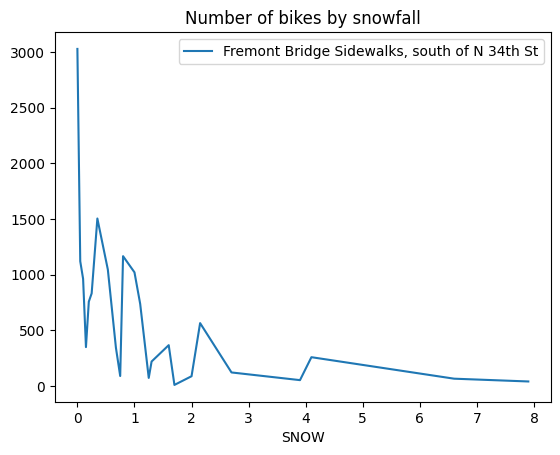

In [23]:
snow_line = combined_data_frame.groupby('SNOW').agg({'Fremont Bridge Sidewalks, south of N 34th St':'mean'})

snow_line.plot(title = 'Number of bikes by snowfall')

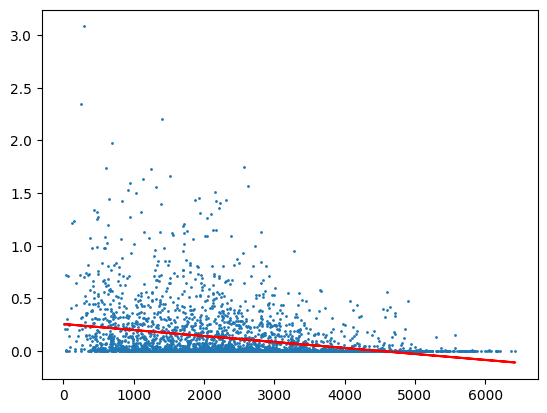

In [24]:
###make a new frame to remove all null PRCP values
nan_mask = combined_data_frame['PRCP'] >= 0
nan_removed = combined_data_frame[nan_mask]



X = nan_removed[['Fremont Bridge Sidewalks, south of N 34th St']]
Y = nan_removed[['PRCP']]


linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y) 
Y_pred = linear_regressor.predict(X)


plt.scatter(X, Y, s = 1)
plt.plot(X, Y_pred, color='red')
#plt.xlabel('Number of Bikers')
plt.show()
